## Error Standard

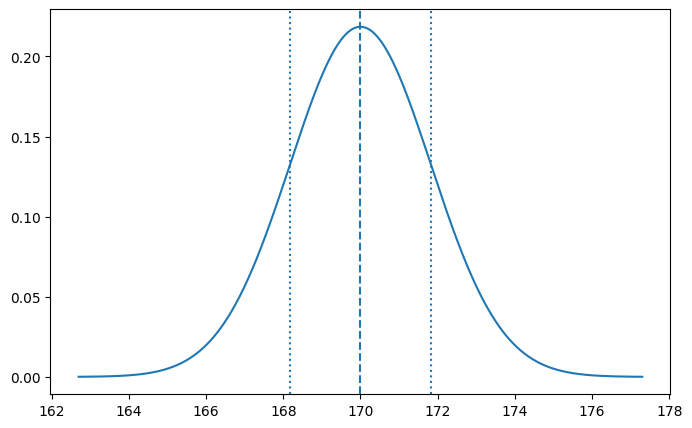

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del ejercicio
mu = 170
sigma = 10
n = 30

# Error estándar
error_estandar = sigma / np.sqrt(n)

# Eje X
x = np.linspace(mu - 4*error_estandar,
                mu + 4*error_estandar, 1000)

# Distribución normal de la media muestral
y = norm.pdf(x, mu, error_estandar)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.axvline(mu, linestyle='--')
plt.axvline(mu - error_estandar, linestyle=':')
plt.axvline(mu + error_estandar, linestyle=':')


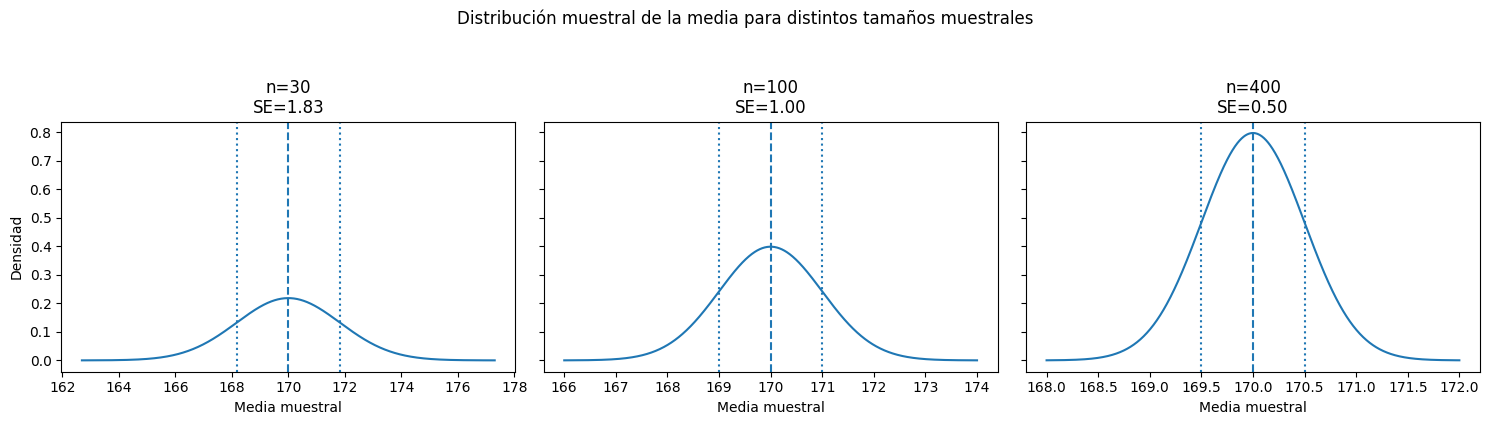

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros poblacionales
mu = 170
sigma = 10
ns = [30, 100, 400]

# Figura con 3 gráficos, compartiendo eje Y
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, n in zip(axes, ns):
    se = sigma / np.sqrt(n)

    # Rango X centrado en mu (4 SE a cada lado)
    x = np.linspace(mu - 4*se, mu + 4*se, 1000)
    y = norm.pdf(x, mu, se)

    ax.plot(x, y)
    ax.axvline(mu, linestyle="--")
    ax.axvline(mu - se, linestyle=":")
    ax.axvline(mu + se, linestyle=":")

    ax.set_title(f"n={n}\nSE={se:.2f}")
    ax.set_xlabel("Media muestral")

axes[0].set_ylabel("Densidad")
fig.suptitle("Distribución muestral de la media para distintos tamaños muestrales", y=1.05)
plt.tight_layout()
plt.show()


🐍 Paso 3 — Cálculo en Python

In [6]:
import numpy as np
from scipy.stats import norm

# Datos
mu = 15
sigma = 5
n = 36
x_bar = 16

# Error estándar
error_estandar = sigma / np.sqrt(n)

# Estadístico Z
z = (x_bar - mu) / error_estandar

# Probabilidad
prob = 1 - norm.cdf(z)

print("Error estándar:", round(error_estandar, 4))
print("Z:", round(z, 4))
print("P(X̄ > 16):", round(prob, 4))


Error estándar: 0.8333
Z: 1.2
P(X̄ > 16): 0.1151


## Ejemplo: Aprobación de un curso

In [9]:
from scipy.stats import norm

# valor de Z
z = -1.02

# probabilidad acumulada
prob = norm.cdf(z)

print(prob)


0.15386423037273478


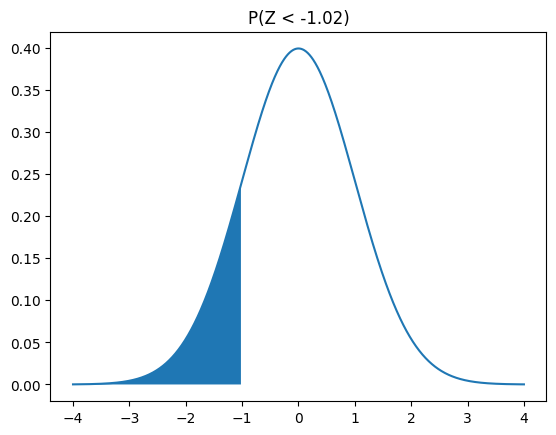

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

z = -1.02

# rango de valores
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, y, where=(x <= z))
plt.title("P(Z < -1.02)")
plt.show()


## Ejercicio 1

1) Calcular el error estándar de una media muestral

Datos:

* 𝜇 = 15
* σ = 5
* n = 36
* x = 16


2. Calcular el error estándar

In [11]:
import numpy as np
mu, sigma, n = 15, 5, 36
SE = sigma/np.sqrt(n)
SE

np.float64(0.8333333333333334)

3. Aplicar fórmula Z

$$Z=\frac{X-\mu}{\sigma/\sqrt{n}}$$

In [21]:
xbar = 16
z = (xbar - mu)/SE
z

np.float64(1.2)

4. Buscar valor en tabla Z
P(Z>1.2)

In [22]:
from scipy.stats import norm

p = 1 - norm.cdf(1.2)   # P(Z > 1.2)
p


np.float64(0.11506967022170822)

In [23]:
print(f"P(Z > 1.2) = {p:.4f}  ({p*100:.2f}%)")


P(Z > 1.2) = 0.1151  (11.51%)


5. Interpretar

* Esto significa que hay un 11.51% de probabilidad de que, aun cuando la media real sea 15 minutos, una muestra de 36 personas tenga un promedio mayor a 16 minutos solo por variabilidad natural.

* Si el tiempo promedio real del banco sigue siendo 15 minutos, no es raro observar una muestra con promedio mayor a 16 minutos. De hecho, eso ocurriría aproximadamente 11 veces cada 100 muestras similares.

# **PARTE 2**

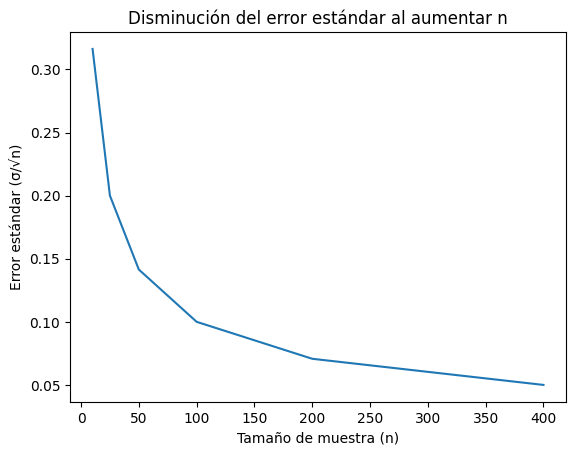

In [24]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
n = np.array([10, 25, 50, 100, 200, 400])
se = sigma / np.sqrt(n)

plt.figure()
plt.plot(n, se)
plt.xlabel("Tamaño de muestra (n)")
plt.ylabel("Error estándar (σ/√n)")
plt.title("Disminución del error estándar al aumentar n")
plt.show()


## Simulación

Desviación estándar n=5: 0.8726771046638104
Desviación estándar n=50: 0.28275955318214235
Media poblacional: 1.9919403181123696
Media medias n=5: 2.0166335380964
Media medias n=50: 1.9957698363127703


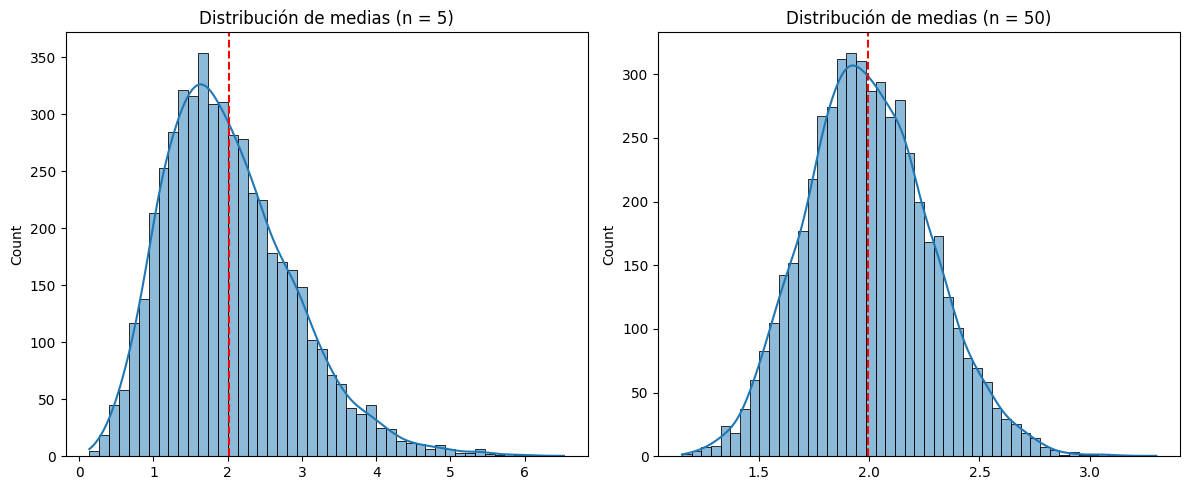

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# 1️⃣ Definir población NO normal (exponencial)
poblacion = np.random.exponential(scale=2, size=100000)

# Función para simular distribución muestral
def simular_medias(n, repeticiones=5000):
    medias = []
    for _ in range(repeticiones):
        muestra = np.random.choice(poblacion, size=n)
        medias.append(np.mean(muestra))
    return medias

# 2️⃣ Simular con n pequeño y n grande
medias_n5 = simular_medias(5)
medias_n50 = simular_medias(50)

print("Desviación estándar n=5:", np.std(medias_n5))
print("Desviación estándar n=50:", np.std(medias_n50))
print("Media poblacional:", np.mean(poblacion))
print("Media medias n=5:", np.mean(medias_n5))
print("Media medias n=50:", np.mean(medias_n50))


# 3️⃣ Graficar
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(medias_n5, kde=True, ax=ax[0])
ax[0].set_title("Distribución de medias (n = 5)")

sns.histplot(medias_n50, kde=True, ax=ax[1])
ax[1].set_title("Distribución de medias (n = 50)")

ax[0].axvline(np.mean(medias_n5), color='red', linestyle='--')
ax[1].axvline(np.mean(medias_n50), color='red', linestyle='--')


plt.tight_layout()
plt.show()


Izquierda — n = 5

* La distribución aún es asimétrica
* Tiene una cola larga a la derecha
* Todavía se nota que la población original era exponencial

Derecha — n = 50

* Mucho más simétrica
* Mucho más concentrada
* Se parece claramente a una normal

La población original era exponencial, claramente sesgada.
Pero cuando calculo medias muchas veces, la forma empieza a normalizarse.
Y mientras más grande es n, más evidente es.

## Ejercicio 2

Un laboratorio clínico desea saber si un nuevo medicamento produce un cambio significativo en la presión arterial. Se toman dos muestras independientes: un grupo control y un grupo tratado, ambos con 30 pacientes.

1. Registrar:
* Media grupo 1 (control): 130, σ₁ = 10
* Media grupo 2 (tratado): 125, σ₂ = 12
* n₁ = n₂ = 30


In [30]:
import numpy as np
from scipy.stats import norm

# 1) Datos
x1, sigma1, n1 = 130, 10, 30   # control
x2, sigma2, n2 = 125, 12, 30   # tratado

No estamos comparando individuos, estamos comparando medias muestrales.

Eso significa que lo que fluctúa por azar no son los datos individuales, sino las medias.

Y ahí entra la distribución muestral.

2. Calcular diferencia de medias: Δ = 130 - 125 = 5

In [31]:
# 2) Diferencia de medias
delta = x1 - x2
delta

5

Observamos una diferencia de 5 unidades de presión arterial.

Pero… ¿5 es mucho o poco?

No lo sabemos todavía. Porque depende de cuánto varían esas medias por azar.

3. Calcular error estándar: √((10²/30) + (12²/30))


In [33]:
# 3) Error estándar de la diferencia
se = np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)
se

np.float64(2.851899951494325)

El error estándar mide cuánto varía la diferencia de medias si repitiéramos el experimento muchas veces.

Si repitiéramos el estudio muchas veces, la diferencia de medias cambiaría típicamente en ±2.85 unidades.

4. Calcular Z: Z = Δ / error estándar

In [35]:
# 4) Estadístico Z
z = delta / se
z

np.float64(1.7532171832956915)

¿Qué significa 1.75?

Significa que la diferencia observada está a 1.75 errores estándar del cero.

En otras palabras:
No es enorme.
Pero tampoco es insignificante.

5. Buscar P en tabla Z y concluir

In [41]:
# 5) p-valor
p = 1 - norm.cdf(z)  #  H1: (mu1 - mu2) > 0

print("P-valor:", p)

P-valor: 0.039782367296595234


Entonces:

Si la hipótesis "¿el medicamento reduce presión?":
p ≈ 0.04 → Sí sería significativo


6. Comentar si es significativo y clínicamente relevante

In [42]:
# Resultados
print("=== Comparación de medias (aprox. Z) ===")
print(f"Δ = x̄1 - x̄2 = {delta:.4f}")
print(f"SE = {se:.4f}")
print(f"Z  = {z:.4f}")

print("\n--- p-value ---")
print(f"p (unilateral) = {p:.4f}  (H: mu1 - mu2 > 0)")

# Comentario rápido automático (opcional)
alpha = 0.05
print("\n--- Conclusión (α=0.05) ---")
print("Unilateral:", "Significativo" if p < alpha else "No significativo")

=== Comparación de medias (aprox. Z) ===
Δ = x̄1 - x̄2 = 5.0000
SE = 2.8519
Z  = 1.7532

--- p-value ---
p (unilateral) = 0.0398  (H1: mu1 - mu2 > 0)

--- Conclusión (α=0.05) ---
Unilateral: Significativo


H: mu1 - mu2 > 0

Eso significa que estás evaluando si la presión del control es mayor que la del tratado, es decir, si el medicamento reduce la presión.